# programa que analice un documente .docx

----------------------------------------------------------------------
Número de palabras en el documento: 718
----------------------------------------------------------------------
Número de líneas de texto en el documento: 33
----------------------------------------------------------------------
La palabra 'dos' aparece 25 veces en el documento.
----------------------------------------------------------------------
Palabras cortas de 3 o 4 caracteres: ['DOS', '¿Qué', 'DOS', 'Disk', 'base', 'para', 'uso', 'Los', 'los', 'Los', 'con', 'una', 'que', 'que', 'DOS', 'solo', 'sino', 'DOS', 'DOS:', 'DOS?', 'DOS', 'DOS', 'hoy', 'DOS', 'que', 'Bill', 'que', 'IBM', 'que', 'los', 'QDOS', 'and', 'una', 'IBM', 'los', 'IBM', 'como', '1.0.', 'CP/M', '(el', 'que', 'IBM', 'pero', 'que', 'ser', 'mal', 'que', 'por', '2.0', 'como', 'que', 'Dado', 'que', 'IBM', 'una', 'para', 'Bajo', 'uno', 'los', 'más', 'más', 'para', 'que', 'los', 'DOS', 'cada', 'vez', 'más', 'una', 'sus', '1985', 'con', '1.0,', 'que', '

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\jason\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


de
la
que
el
en
y
a
los
del
se
las
por
un
para
con
no
una
su
al
lo
como
más
pero
sus
le
ya
o
este
sí
porque
esta
entre
cuando
muy
sin
sobre
también
me
hasta
hay
donde
quien
desde
todo
nos
durante
todos
uno
les
ni
contra
otros
ese
eso
ante
ellos
e
esto
mí
antes
algunos
qué
unos
yo
otro
otras
otra
él
tanto
esa
estos
mucho
quienes
nada
muchos
cual
poco
ella
estar
estas
algunas
algo
nosotros
mi
mis
tú
te
ti
tu
tus
ellas
nosotras
vosotros
vosotras
os
mío
mía
míos
mías
tuyo
tuya
tuyos
tuyas
suyo
suya
suyos
suyas
nuestro
nuestra
nuestros
nuestras
vuestro
vuestra
vuestros
vuestras
esos
esas
estoy
estás
está
estamos
estáis
están
esté
estés
estemos
estéis
estén
estaré
estarás
estará
estaremos
estaréis
estarán
estaría
estarías
estaríamos
estaríais
estarían
estaba
estabas
estábamos
estabais
estaban
estuve
estuviste
estuvo
estuvimos
estuvisteis
estuvieron
estuviera
estuvieras
estuviéramos
estuvierais
estuvieran
estuviese
estuvieses
estuviésemos
estuvieseis
estuviesen
estando
estado
estada
estados
e

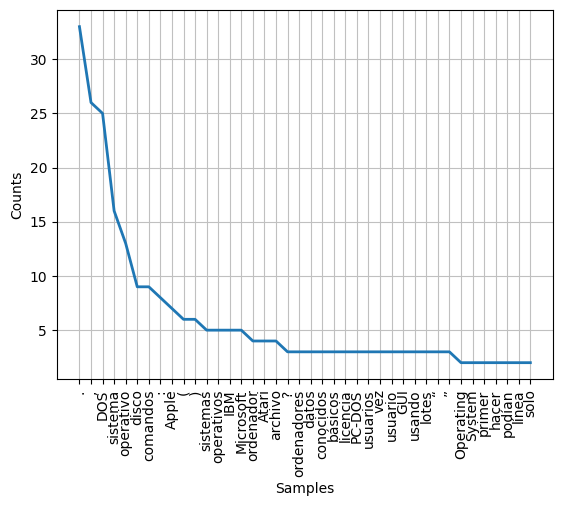

<Axes: xlabel='Samples', ylabel='Counts'>

In [3]:
import docx
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import os
import matplotlib.pyplot as plt

while True:
    # Solicitar al usuario el nombre del archivo .docx
    nombre_archivo = input("Por favor, ingresa el nombre del archivo .docx (incluyendo la extensión): ")

    # Verificar si el archivo existe
    if os.path.exists(nombre_archivo):
        # Intentar cargar el documento .docx
        documento = docx.Document(nombre_archivo)
        break  # Salir del bucle si el archivo se encuentra
    else:
        # Si el archivo no se encuentra, imprimir un mensaje de error y continuar con el bucle
        print("El archivo especificado no se encontró. Inténtalo de nuevo.")

# Continuar con el resto del código utilizando el documento cargado
texto_pagina = ""
for parrafo in documento.paragraphs:
    texto_pagina += parrafo.text + "\n"



# Función para contar el número de palabras y líneas en un texto
def contar_palabras_lineas(texto):
    palabras = texto.split()
    lineas = texto.split('\n')
    return len(palabras), len(lineas)

# Función para contar la frecuencia de una palabra en un texto
def contar_frecuencia_palabra(texto, palabra):
    palabras = word_tokenize(texto.lower())
    return palabras.count(palabra.lower())

# Función para contar palabras de 3 o 4 caracteres
def contar_palabras_cortas(texto):
    palabras_cortas = [palabra for palabra in texto.split() if len(palabra) in [3, 4]]
    return palabras_cortas



# Contar palabras y líneas
num_palabras, num_lineas = contar_palabras_lineas(texto_pagina)

# Imprimir resultados
print("----------------------------------------------------------------------")
print("Número de palabras en el documento:", num_palabras)
print("----------------------------------------------------------------------")
print("Número de líneas de texto en el documento:", num_lineas)

# Contar frecuencia de una palabra específica
palabra_a_buscar = input("Ingrese la palabra que desea buscar en el documento: ")
frecuencia_palabra = contar_frecuencia_palabra(texto_pagina, palabra_a_buscar)
print("----------------------------------------------------------------------")
print(f"La palabra '{palabra_a_buscar}' aparece {frecuencia_palabra} veces en el documento.")

# Contar palabras cortas de 3 o 4 caracteres
palabras_cortas = contar_palabras_cortas(texto_pagina)
print("----------------------------------------------------------------------")
print("Palabras cortas de 3 o 4 caracteres:", palabras_cortas)

# Guardar el texto extraído en un archivo de texto
if texto_pagina:
    with open("texto_pagina1.txt", "w", encoding="utf-8") as archivo:
        archivo.write(texto_pagina)

# Cargar el texto del archivo
archivo_nombre = "texto_pagina1.txt"
with open(archivo_nombre, "r", encoding="utf-8") as archivo:
    texto = archivo.read()

print("----------------------------------------------------------------------")

# Cargar palabras funcionales en español de NLTK
nltk.download("stopwords")
nltk.download("punkt")
palabras_funcionales = stopwords.words("spanish")
for palabra_funcional in palabras_funcionales:
    print(palabra_funcional)

print("----------------------------------------------------------------------")

# Tokenizar el texto y eliminar palabras funcionales
tokens = word_tokenize(texto, "spanish")
tokens_limpios = [token for token in tokens if token.lower() not in palabras_funcionales]

# Imprimir algunos detalles sobre los tokens
print("tokens limpiaos")
print(tokens_limpios)
print("----------------------------------------------------------------------")
print("Número total de tokens:", len(tokens))
print("----------------------------------------------------------------------")
print("Número de tokens limpios:", len(tokens_limpios))

# Crear un objeto Text de NLTK y calcular la distribución de frecuencia
texto_limpio_nltk = nltk.Text(tokens_limpios)
distribucion_limpia = nltk.FreqDist(texto_limpio_nltk)

# Graficar las 40 palabras más comunes
distribucion_limpia.plot(40)
